In [1]:
import pandas as pd
import numpy as np
import itertools
import functools
import importlib

In [ ]:
# Binary classification:
from nl_03_filter_model_score import filter_split_model_score

In [ ]:
# Regression:
from nl_03_filter_model_reg import filter_split_model_score

### This script runs the neutral loss scripts for MALDI IMS data

1. nl_00 Calculates Mordred descriptors and FP4 fingerprints as bits.
2. nl_01 Filter HMDB_db for observed and parses METASPACE output.
3. nl_02 Joins HMDB_db and METASPACE output.
4. nl_03 Filters and searchs with direct and machine learning models.

### To do:
5. nl_04 deep learning: executing on toy data, change to regression
6. Thunder SVM no.
7. Calculate %NL observed by ID...
8. https://stackoverflow.com/questions/46826773/how-can-i-merge-rows-by-same-value-in-a-column-in-pandas-with-aggregation-func

### Observations:
1. 2912/3333 datasets a) did not error and b) had at least one id.  
2. 644,094 values identifications, the dataset with the most identifications had 5,820 and mean was 221 (median 131).
3. The data did not pass the Shapiro-Wilk test for normality, and nonparametrical statistics should be used.

In [105]:
# Merge pickles for each dataset.
master_df = pd.DataFrame()
counter = 0

for root, dirs, files in os.walk("/Users/dis/PycharmProjects/neutal_loss_2/public_water_pickle"):
    for file in files:
        if file.endswith(".pickle"):
            if counter % 500 == 0:
                print(counter)
            counter +=1
            current_df = pd.read_pickle(root + '/' + file)
            master_df = pd.concat([master_df, current_df], sort=True)

# If water
terse_headers_0 = ['formula', 'adduct', 'ds_id', 'has_no_loss', 'has_H2O',
                   'msm', 'fdr', 'off_sample', 'hmdb_ids', 'intensity_avg',
                   'msm_H2O', 'fdr_H2O', 'off_sample_H2O', 'intensity_avg_H2O',
                   'colocalization_H2O', 'loss_intensity_ratio_H2O', 'loss_intensity_share_H2O']

master_df[terse_headers_0].to_pickle('all_public_data.pickle')

0
500
1000
1500
2000
2500


In [4]:
# Loads merged pickles from previous step
dataset = 'all_public_data.pickle'  # A GB

In [ ]:
# To be built, downloads HMDB and calculates molecules

In [98]:
# nl_00: Generates FP4 descriptors ('bits') and Mordred descriptors
# 10420s
%run nl_00_hmdb_pre.py

  0%|          | 47/114100 [00:01<2:52:10, 11.04it/s]

/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  0%|          | 126/114100 [00:03<1:12:07, 26.34it/s]

/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  0%|          | 439/114100 [00:12<1:24:50, 22.33it/s]

/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  0%|          | 460/114100 [00:13<1:15:11, 25.19it/s]

/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  0%|          | 475/114100 [00:14<1:47:05, 17.68it/s]

/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|          | 613/114100 [00:18<1:40:10, 18.88it/s]

/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|          | 627/114100 [00:19<2:18:34, 13.65it/s]

/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|          | 644/114100 [00:21<2:34:49, 12.21it/s]

/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|          | 731/114100 [00:25<3:53:02,  8.11it/s]

/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|          | 1030/114100 [00:40<1:16:46, 24.54it/s]

/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|▏         | 1444/114100 [00:55<1:49:11, 17.19it/s]

/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|▏         | 1459/114100 [00:56<2:23:04, 13.12it/s]

/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  7%|▋         | 7686/114100 [15:55<6:53:41,  4.29it/s]  

/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/mordred/_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in double_scalars
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5
/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/mordred/_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in double_scalars
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5
/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/mordred/_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in double_scalars
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5
/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/mordred/_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in double_scalars
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5
/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/mordred/_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in doub

100%|██████████| 114100/114100 [4:54:22<00:00,  6.46it/s]   


Elapsed time:

18533.797726869583

Executed without error

all_public.pickle


In [106]:
# Loads pickles from previous step
input_df = pd.read_pickle('all_public_data.pickle')
hmdb_df = pd.read_pickle('all_public_hmdb.pickle') # 0.1 Gb
mord_norm_df = pd.read_pickle('mord_norm_hmdb_df.pickle')  # 0.8 Gb
bits_df = pd.read_pickle('bits_hmdb_df.pickle')  #0.2 Gb

In [109]:
# nl_01: Parses METASPACE output and filters HMDB for observed
%run nl_01_preprocess.py -m all_public_data.pickle -p all_public_hmdb.pickle -is_H2O True

Elapsed time (seconds):

22

Executed without error

all_public_data_output_01.pickle
all_public_data_hmdb_01.pickle


In [110]:
# Loads pickles from previous step
output_1 = pd.read_pickle('all_public_output_01.pickle')
hmdb_1 = pd.read_pickle('all_public_hmdb_01.pickle')

In [116]:
# nl_02: Joins METASPACE output and observed HMDB
%run nl_02_join.py --o all_public_output_01.pickle --h all_public_hmdb_01.pickle

Elapsed time:


Executed without error

2952.2901570796967
all_public_output_02.pickle


In [83]:
# Load X's if running machine learning
join_df_path = 'all_public_output_02.pickle' 
join_df = pd.read_pickle(join_df_path)  # 0.5 Gb
unique_hmdbs = list(join_df.hmdb_ids.unique())

mord_df = pd.read_pickle('mord_norm_hmdb_df.pickle') # 0.2 Gb
mord_df = mord_df[mord_df.hmdb_ids.isin(unique_hmdbs)].copy(deep=True)

bits_df = pd.read_pickle('bits_hmdb_df.pickle') # 0.8 Gb
bits_df = bits_df[bits_df.hmdb_ids.isin(unique_hmdbs)].copy(deep=True)

In [71]:
list(join_df)

['formula',
 'hmdb_ids',
 'polarity',
 'ds_id',
 'num_ids',
 'has_no_loss',
 'H2O_Present',
 'fdr',
 'fdr_H2O',
 'colocalization_H2O',
 'loss_intensity_share_H2O',
 'n_loss_only_H2O',
 'n_loss_wparent_H2O',
 'off_sample',
 'off_sample_H2O',
 'intensity_avg',
 'intensity_avg_H2O',
 'trues',
 'falses',
 'rando',
 'Molecule',
 'weight']

In [ ]:
# Split into new sheet and look at this in detail.  Compare no loss,
# n_loss_wparent, n_loss_only.  Make sure everything is working correctly.
# Review Theodore's request

In [84]:
# Not working?
join_df = join_df[(join_df.has_no_loss == True) | 
                 (join_df.n_loss_wparent_H2O == True)]

In [85]:
join_df = join_df[join_df.polarity ==-1].copy(deep=True)

In [88]:
join_df.sample(20)

,formula,hmdb_ids,polarity,ds_id,num_ids,has_no_loss,H2O_Present,fdr,fdr_H2O,colocalization_H2O,...,n_loss_wparent_H2O,off_sample,off_sample_H2O,intensity_avg,intensity_avg_H2O,trues,falses,rando,Molecule,weight
4460506,C22H29O3,HMDB0062685,-1,2018-03-23_11h59m35s,1,True,True,0.10,NaN,0.000000,...,False,1.0,NaN,2.597451e+03,NaN,True,False,True,<rdkit.Chem.rdchem.Mol object at 0x1a59563a08>,0.900000
1643310,C17H16O4,HMDB0130372,-1,2017-05-07_16h43m57s,19,True,False,0.20,NaN,0.000000,...,False,1.0,NaN,1.969988e+03,NaN,True,False,False,<rdkit.Chem.rdchem.Mol object at 0x1a59056c38>,0.042105
2431212,C41H78NO8P,HMDB0009286,-1,2017-08-02_00h07m28s,28,True,False,0.05,NaN,0.000000,...,False,1.0,NaN,1.540799e+06,NaN,True,False,False,<rdkit.Chem.rdchem.Mol object at 0x1ab4c8cb58>,0.033929
1572815,C45H82NO8P,HMDB0009585,-1,2019-10-29_21h43m57s,43,True,False,0.10,0.20,0.147218,...,True,0.0,0.0,6.260050e-01,1.175264,True,False,False,<rdkit.Chem.rdchem.Mol object at 0x1a587121b8>,0.020930
6038224,C16H16O4,HMDB0133978,-1,2017-06-28_16h26m05s,27,True,True,0.20,NaN,0.000000,...,False,1.0,NaN,2.615305e+03,NaN,True,False,False,<rdkit.Chem.rdchem.Mol object at 0x1a7056e340>,0.029630
1895839,C16H14O4,HMDB0130377,-1,2017-06-23_16h58m35s,16,True,True,0.20,NaN,0.000000,...,False,1.0,NaN,7.624029e+02,NaN,True,False,False,<rdkit.Chem.rdchem.Mol object at 0x1a587f3dc0>,0.050000
2580259,C12H22O11,HMDB0006792,-1,2019-06-06_21h41m37s,28,True,True,0.05,NaN,0.000000,...,False,0.0,NaN,2.531386e+01,NaN,True,False,False,<rdkit.Chem.rdchem.Mol object at 0x1a58b71848>,0.033929
3169130,C45H78NO7P,HMDB0009678,-1,2017-03-14_06h00m36s,10,True,False,0.05,NaN,0.000000,...,False,0.0,NaN,1.497717e+06,NaN,True,False,True,<rdkit.Chem.rdchem.Mol object at 0x1ab4c65768>,0.095000
1827167,C39H76NO8P,HMDB0008927,-1,2019-05-23_20h46m30s,24,True,False,0.20,NaN,0.000000,...,False,0.0,NaN,3.973583e-01,NaN,True,False,True,<rdkit.Chem.rdchem.Mol object at 0x1a589ffdc0>,0.033333
1067123,C43H78NO8P,HMDB0009259,-1,2017-11-07_10h36m47s,50,True,False,0.05,NaN,0.000000,...,False,0.0,NaN,2.374724e+07,NaN,True,False,True,<rdkit.Chem.rdchem.Mol object at 0x1ab4c540d8>,0.019000


In [63]:
good_cols = ['hmdb_ids', 'H2O_Present', 'n_loss_wparent_H2O',
             'intensity_avg', 'intensity_avg_H2O',]
join_df = join_df[good_cols].copy(deep=True)

In [72]:
join_df['int_ratio'] = join_df['intensity_avg_H2O'] / join_df['intensity_avg']

In [81]:
join_df.int_ratio.sample(50)

1012090          NaN
1266896          NaN
4989176          NaN
1706737          NaN
3958476          NaN
3150720     1.305717
518773           NaN
4146364          NaN
642252           NaN
2150948          NaN
1198297          NaN
1357007          NaN
2895766          NaN
2831159          NaN
4266114          NaN
5122096          NaN
4666287          NaN
3518200          NaN
5990581          NaN
2700804          NaN
5785444          NaN
3371824          NaN
1345170          NaN
2406090          NaN
3938261          NaN
4262413          NaN
1875470          NaN
4654382     0.240899
1862163          NaN
5368330          NaN
2739429          NaN
5953374          NaN
1160877          NaN
1765443          NaN
2924923          NaN
3638509    33.941425
857324           NaN
6107158          NaN
501261           NaN
4969073          NaN
327132           NaN
1591451          NaN
1321180          NaN
2679126          NaN
1931765          NaN
3501071          NaN
5079922          NaN
1347554      

In [80]:
join_df['n_obs'] = 1

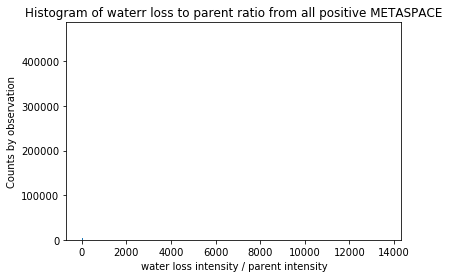

In [82]:
x = join_df['int_ratio']
fig, ax = plt.subplots()
ax.hist(x, 1000)

ax.set_xlabel('water loss intensity / parent intensity')
ax.set_ylabel('Counts by observation')
ax.set_title('Histogram of waterr loss to parent ratio from all positive METASPACE')
#plt.ylim(0, 3000)
plt.show()

In [65]:
join_df = join_df.groupby('hmdb_ids').aggregate({'H2O_Present':'mean',
                                       'n_loss_wparent_H2O': 'sum',
                                      'n_obs': 'sum'})

In [66]:
join_df['p_n_loss_wparent_H2O'] = join_df['n_loss_wparent_H2O'] / join_df['n_obs']


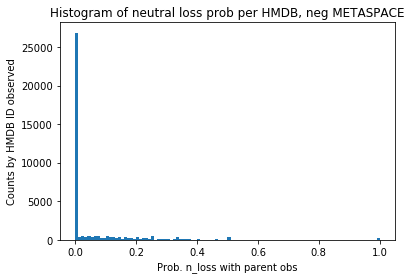

In [68]:
x = join_df['p_n_loss_wparent_H2O']
fig, ax = plt.subplots()
ax.hist(x, 50)

ax.set_xlabel('Prob. n_loss with parent obs')
ax.set_ylabel('Counts by HMDB ID observed')
ax.set_title('Histogram of neutral loss prob per HMDB, neg METASPACE')
#plt.ylim(0, 3000)
plt.show()

In [12]:
# nl_03: Filtering and machine learning models
target = ['H2O'] # ['H2O']
polarity = [1] # {1:positive, -1:negative] 
fdrs = [0.10] # [0.20, 0.10, 0.05]
colocalizations = [0.50] # [0.00, 0.50, 0.75]

# Outputs (y), and weights (w):
global_ys = ['n_loss_only_H2O', 'n_loss_wparent_H2O']
y = [global_ys[1]]
w = ['weight']

# Class of model:
models = ['direct', 'ml', 'deepchem']
model = [models[1]]

# Split.  If true, any formula only appears in train/test/validate.
single_fold_group = True

filter_model_df = pd.DataFrame(columns=['target', 'polarity', 'fdr', 'coloc',
                                       'model', 'submodel', 'params', 'X', 'y', 'w'])

# Specific inputs (X) for each model:
if model[0] is 'direct':
    submodel = ['']
    params = ['']
    Xs = ['trues', 'falses', 'rando', 'H2O_Present', 'n_loss_wparent_H2O']
    X = [Xs[3]]
                              
    
elif model[0] is 'ml':
    submodels = ['random_forest', 'XGBoost', 'ThunderSVM']
    submodel = [submodels[2]]
    params = ['']
    Xs = ['bits', 'mord_norm'] 
    X = [Xs[0]]

elif model[0] is 'deepchem':
    submodels = [('GraphConvModel', 'GraphConv'), 
              ('WeaveModel', 'Weave'), 
              ('MPNNModel','Weave') ] 
    submodel = [submodels[0]]    
    params = ['']
    Xs = ['Molecule', 'Smiles']
    X = [Xs[0]]          
    
    
model_list = list(itertools.product(*[target, polarity, fdrs, colocalizations,
                                      model, submodel, params, X, y, w]))
filter_param_df = pd.DataFrame(model_list, columns=['target', 'polarity', 'fdr', 'coloc',
                                                    'model', 'submodel', 'params', 
                                                    'X', 'y', 'w'])

filter_param_df

,target,polarity,fdr,coloc,model,submodel,params,X,y,w
0,H2O,1,0.1,0.5,ml,ThunderSVM,,bits,n_loss_wparent_H2O,weight


In [ ]:
model_results = filter_split_model_score(filter_param_df, join_df_path, mord_df, bits_df,
                                         single_fold_group)

start 0
splitting 0
modeling 0
ml
mL_dfs
train_y: (699148,)
train_w: (699148,)
train_X: (699148, 1024)


In [10]:
model_results.round(3)

,target,polarity,fdr,coloc,model,submodel,params,X,y,w,...,spec,f1,test_n,test_true,tp,tn,fp,fn,acc_train,acc_test
0,H2O,1,0.1,0.5,ml,XGBoost,,bits,n_loss_wparent_H2O,weight,...,0.998,0.04,699148,2789,1792,611212,997,85147,0.877,0.877


In [11]:
all_model_results = pd.read_pickle('all_model_results.pickle')
all_model_results = pd.concat([all_model_results, model_results])
all_model_results.to_pickle('all_model_results.pickle')
all_model_results.round(3)

,target,polarity,fdr,coloc,model,submodel,params,X,y,w,...,spec,f1,test_n,test_true,tp,tn,fp,fn,acc_train,acc_test
0,H2O,1,0.10,0.50,direct,,,trues,n_loss_wparent_H2O,weight,...,0.000,0.165,349909,349909,31561,0,318348,0,0.125,0.090
1,H2O,1,0.10,0.50,direct,,,falses,n_loss_wparent_H2O,weight,...,1.000,0.000,349909,0,0,318348,0,31561,0.875,0.910
2,H2O,1,0.10,0.50,direct,,,rando,n_loss_wparent_H2O,weight,...,0.515,0.153,349909,169933,15417,163832,154516,16144,0.503,0.512
3,H2O,1,0.10,0.50,direct,,,H2O_Present,n_loss_wparent_H2O,weight,...,0.738,0.274,349909,101594,18233,234987,83361,13328,0.685,0.724
4,H2O,1,0.10,0.50,direct,,,n_loss_wparent_H2O,n_loss_wparent_H2O,weight,...,1.000,1.000,349909,31561,31561,318348,0,0,1.000,1.000
5,H2O,-1,0.10,0.50,direct,,,trues,n_loss_wparent_H2O,weight,...,0.000,0.265,93330,93330,14246,0,79084,0,0.130,0.153
6,H2O,-1,0.10,0.50,direct,,,falses,n_loss_wparent_H2O,weight,...,1.000,0.000,93330,0,0,79084,0,14246,0.870,0.847
7,H2O,-1,0.10,0.50,direct,,,rando,n_loss_wparent_H2O,weight,...,0.493,0.235,93330,47320,7233,38997,40087,7013,0.506,0.495
8,H2O,-1,0.10,0.50,direct,,,H2O_Present,n_loss_wparent_H2O,weight,...,0.596,0.199,93330,37036,5092,47140,31944,9154,0.510,0.560
9,H2O,-1,0.10,0.50,direct,,,n_loss_wparent_H2O,n_loss_wparent_H2O,weight,...,1.000,1.000,93330,14246,14246,79084,0,0,1.000,1.000


To debug:
1. ml functions: SVM
2. deepchem functions: Weave, MPNN, transfer to nl03.  predictprob
3. Pass arguments named_tuples to functions for opt?
4. y = Scrambled as option for same balance of classes instead of rando

In [ ]:
# Check for nans in mord_df